## Objective

To predict which customer is more likely to purchase the newly introduced travel package.

## Data Description

Customer details:

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

Customer interaction data:

- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [3]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
!pip install xgboost
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

In [4]:
tourism = pd.read_excel("Tourism.xlsx")

In [5]:
data = tourism.copy() #copying to avoid changes to original data

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [8]:
data.shape

(4888, 20)

4888 rows and 20 columns in the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Observations: 
- There is a good mix of datatypes
- There are missing values present in the data
- 6 categorical variables

In [10]:
print ("#"*40,"\nMissing values :\n\n", data.isnull().sum().sort_values(ascending=False))

######################################## 
Missing values :

 DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64


Observations:
- The most number of missing values is seen in "DurationOfPitch"
- Next highest are monthly income and age which have similar amounts of missing values
- Number of trips has a relatively low amount of missing values but Children visiting, followups, property star, and type of contact have the least amounts comparatively.
- Target variable (ProdTaken) has no missing values

### Data Summary

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


- Customer ID contains unique values so it won't contribute to analysis
- Average age is 37 and median is 36 so it seems to follow a normal distribution, age range is 18-61
- Average duration of pitch was 15 mins and ranged from 5-127 mins. As most values fall under 20 mins, there seem to be some outliers present.
- The avg number of trips a customer takes in a year is about 3-4 but seems to have extreme values up to 22
- Monthly income averages to about 23k with max being 98k

## Data Preprocessing

In [12]:
#Dropping customer ID since it doesn't contribute to analysis
data.drop(['CustomerID'],axis=1,inplace=True)

In [13]:
# changing objects to categorical
cat_cols = ['TypeofContact','Gender','Occupation','Designation',
            'ProductPitched','ProdTaken', 'Passport',
            'CityTier','MaritalStatus','OwnCar'
            ]
data[cat_cols] = data[cat_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [14]:
# checking to see unique values in need of correction
for i in cat_cols:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Designation are :
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Uniq

- "Fe Male" is a category of its own, it is likely a typo and can be added to the "Female" cstegory.
- Most people targeted are salaried, likely meaning they are more likely to afford the travel package
- Most people self inquired about the company
- Basic package most pitched
- Most people that are pitched to don't have passports
- Currently most targeted are those who are married 

In [15]:
# correcting gender typo
data['Gender']= data['Gender'].apply(lambda x: 'Female' if x == 'Fe Male' else x)

In [16]:
# displaying corrected gender counts
data.Gender.value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

In [17]:
# seperate age into smaller categories to see if there is significance in ages
data['Age_Bin'] = pd.cut(data['Age'], bins = [18,25, 31, 40, 50, 65], labels = ['18-25','26-30', '31-40', '41-50', '51-65'])

In [18]:
data.Age_Bin.value_counts()

31-40    1722
41-50    1073
26-30     971
51-65     549
18-25     333
Name: Age_Bin, dtype: int64

- Most people are between ages 31 and 40 and then 41-50.
- This may be due to more disposable income due to time and saving

## EDA

### Univariate Analysis


In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Check spread for quantitative columns

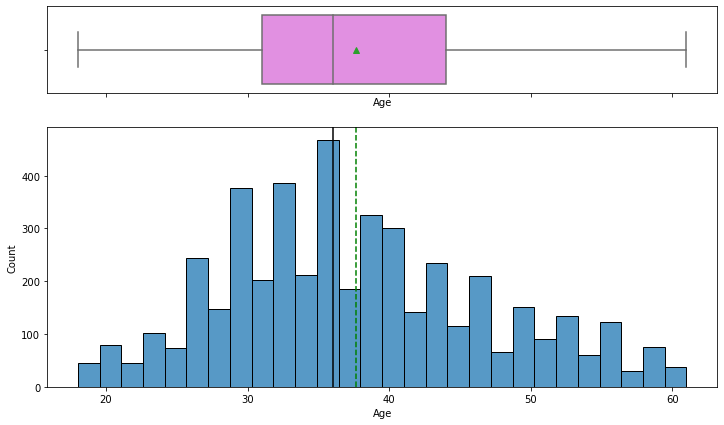

In [20]:
histogram_boxplot(data,'Age')

- Age is normally distributed 

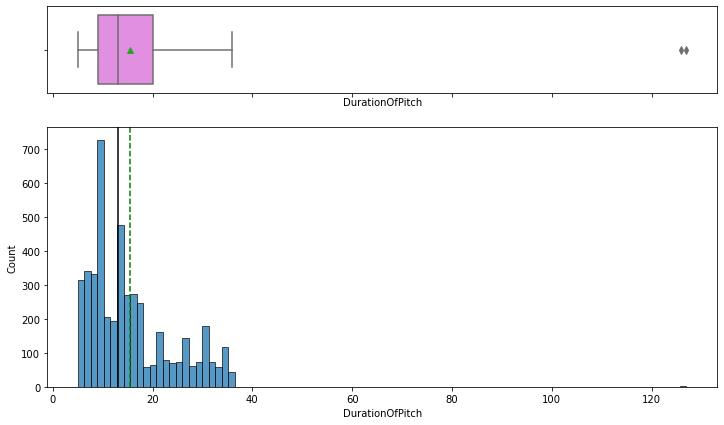

In [21]:
histogram_boxplot(data,'DurationOfPitch')

- Duration of pitch is skewed to the right and seems to have outliers over 120

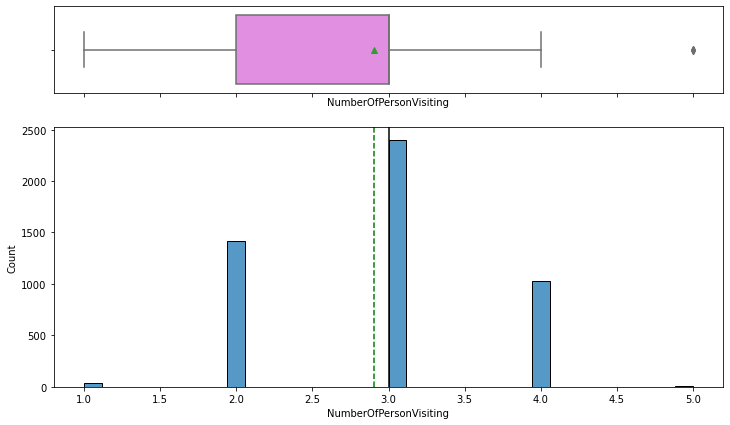

In [22]:
histogram_boxplot(data,'NumberOfPersonVisiting')

- Number of people who visit is most commonly 3 people, 5 looks to be an outlier

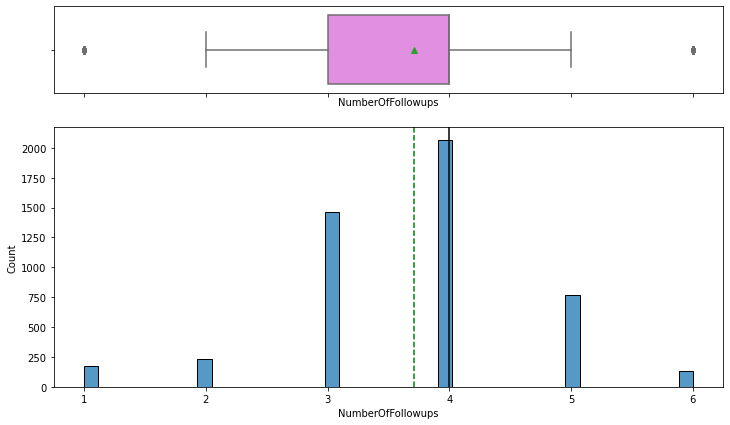

In [23]:
histogram_boxplot(data,'NumberOfFollowups')

- Most number of follow ups are 4, with 6 follow ups being an outlier.

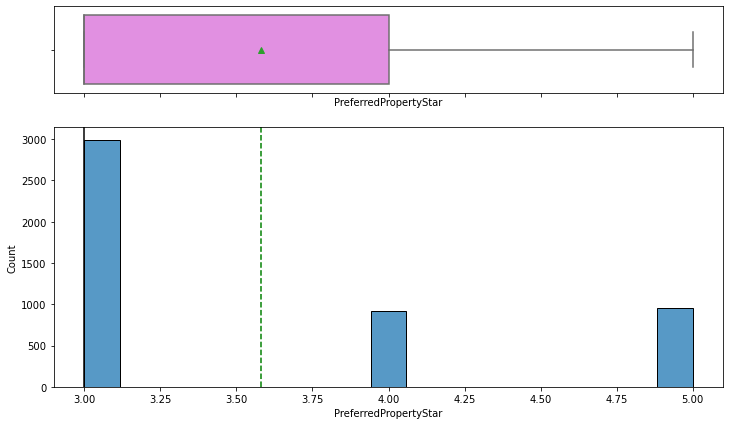

In [24]:
histogram_boxplot(data,'PreferredPropertyStar')

- 3 star hotels most preferred by customer

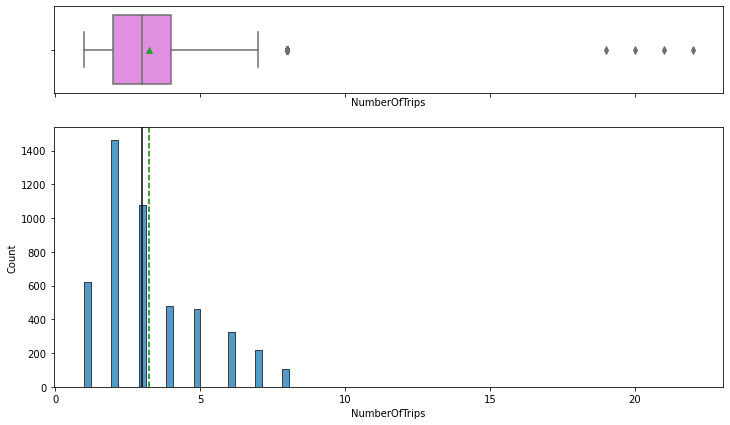

In [25]:
histogram_boxplot(data,'NumberOfTrips')

- Number of trips slightly right skewed with 8+ being outliers.

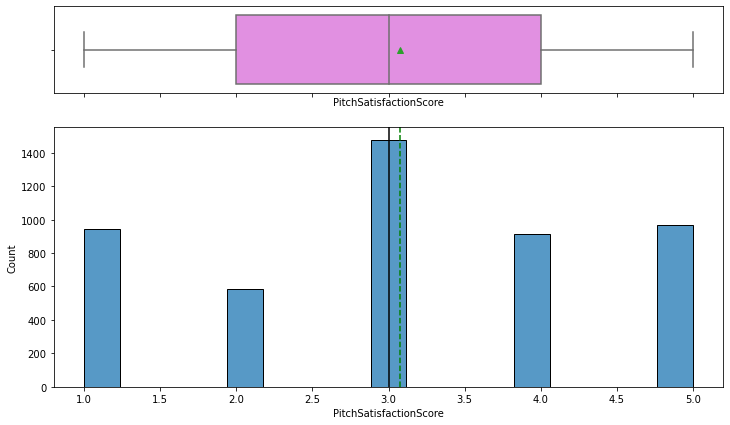

In [26]:
histogram_boxplot(data,'PitchSatisfactionScore')

- Most common pitch satisfaction rating around 3

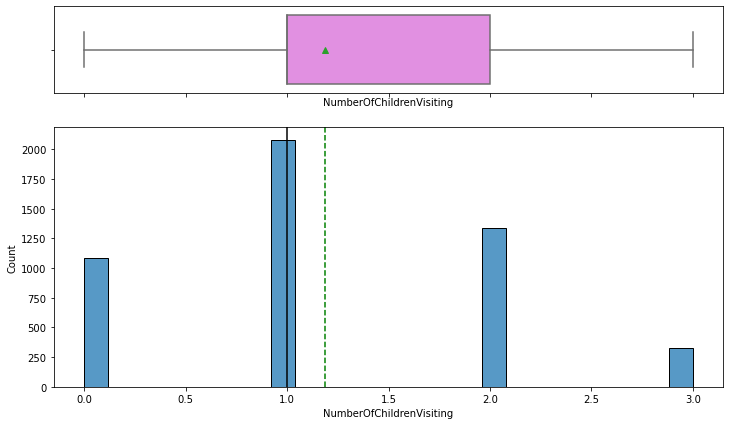

In [27]:
histogram_boxplot(data,'NumberOfChildrenVisiting')

- Most customer have 1 child visiting

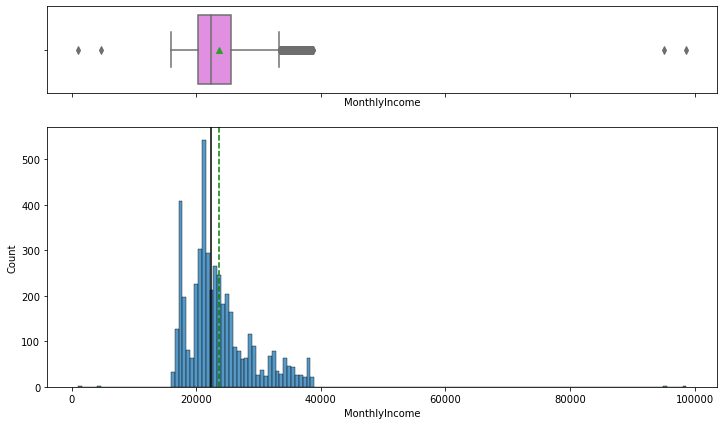

In [28]:
histogram_boxplot(data,'MonthlyIncome')

- Monthly income is right skewed and has some outliers on both sides

In [29]:
# creating barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

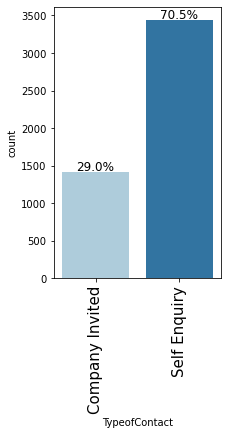

In [30]:
labeled_barplot(data,"TypeofContact",perc=True)

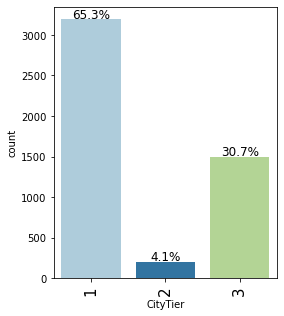

In [31]:
labeled_barplot(data,"CityTier",perc=True)

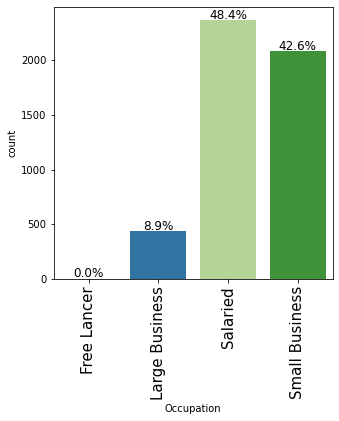

In [32]:
labeled_barplot(data,"Occupation",perc=True)

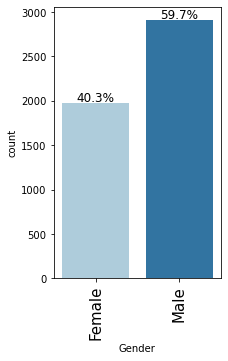

In [33]:
labeled_barplot(data,"Gender",perc=True)

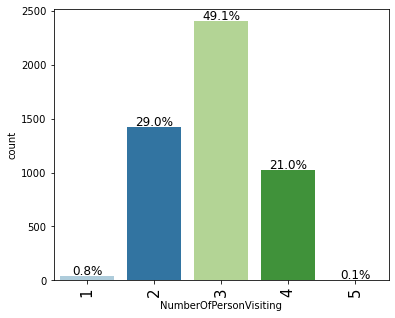

In [34]:
labeled_barplot(data,"NumberOfPersonVisiting",perc=True)

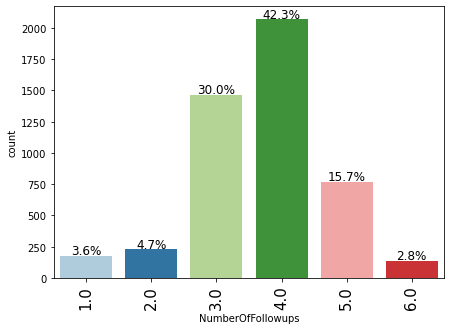

In [35]:
labeled_barplot(data,"NumberOfFollowups",perc=True)

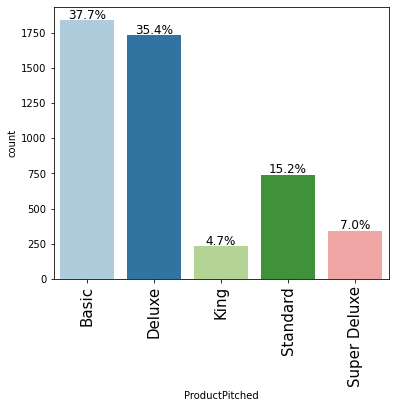

In [36]:
labeled_barplot(data,"ProductPitched",perc=True)

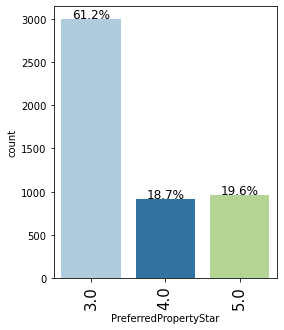

In [37]:
labeled_barplot(data,"PreferredPropertyStar",perc=True)

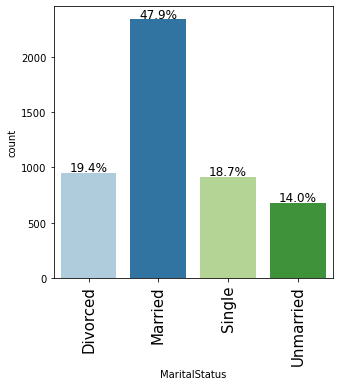

In [38]:
labeled_barplot(data,"MaritalStatus",perc=True)

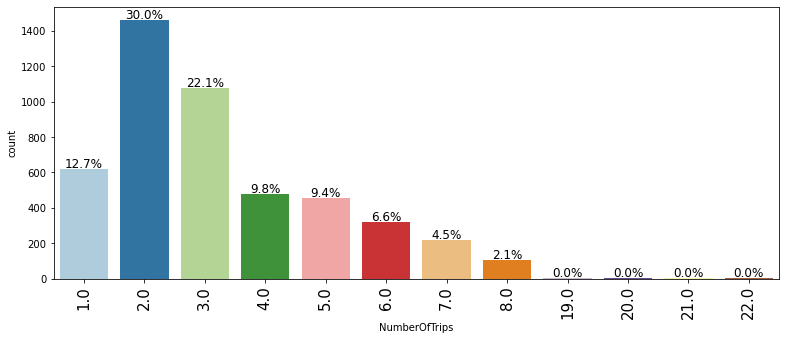

In [39]:
labeled_barplot(data,"NumberOfTrips",perc=True)

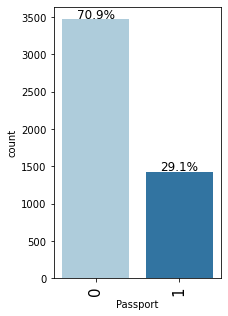

In [40]:
labeled_barplot(data,"Passport",perc=True)

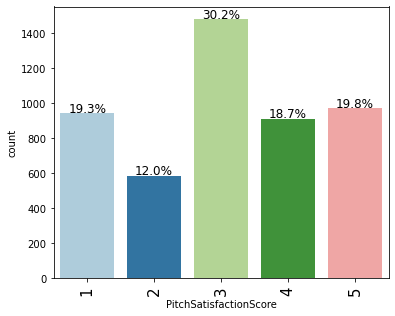

In [41]:
labeled_barplot(data,"PitchSatisfactionScore",perc=True)

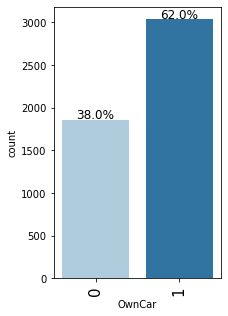

In [42]:
labeled_barplot(data,"OwnCar",perc=True)

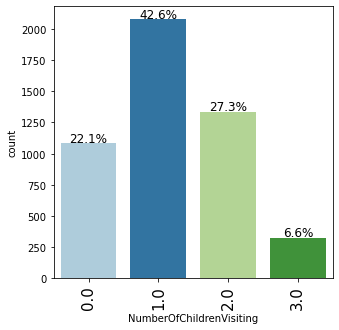

In [43]:
labeled_barplot(data,"NumberOfChildrenVisiting",perc=True)

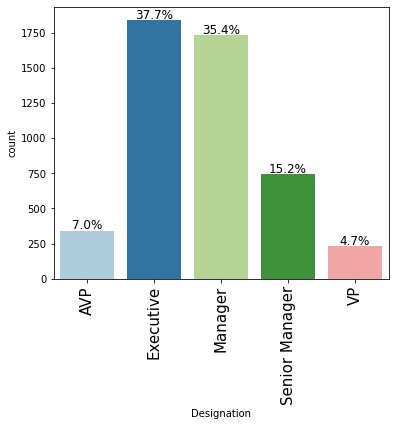

In [44]:
labeled_barplot(data,"Designation",perc=True)

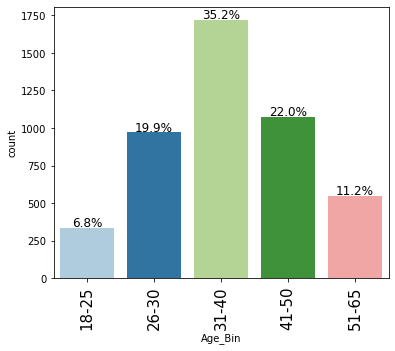

In [45]:
labeled_barplot(data,"Age_Bin",perc=True)

Observations:
- 70% of people self-enquire about the company
- Most cities are tier 1 cities, more developed
- Most people in the sample are either salaried or have a small business
- 3 people groups seems to make up almost half of those who visit
- 3 or 4 followups were given about 72% of the time
- The basic and deluxe packages are the most commonly pitched 
- 3 stars seems to be most commonly desired Property rating
- About half of those contacted are married, this may be important
- Most people don't own passports (~70%)
- Pitch satisfaction score most commonly was given a 3 at 30%
- 62% of people own a car
- 42% of customers have 1 child visiting
- Excutives and Managers are the 2 most common designations for customers
- Customers aged 31-40 made up 35% of customer base.

### Multivariate Analysis

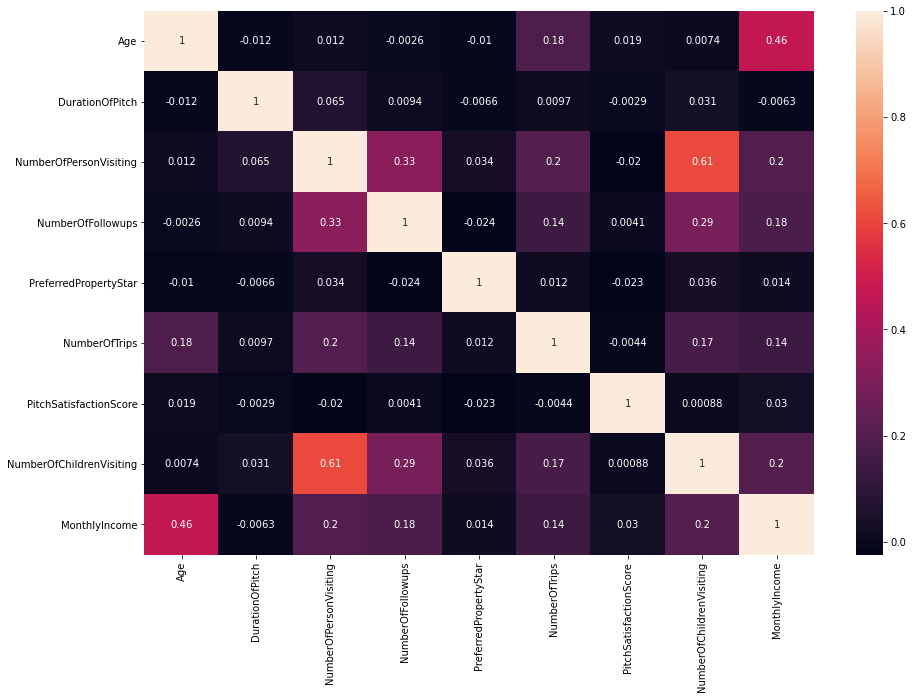

In [46]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

- Monthly income and age have a relatively weak correlation
- Number of person visiting and number of children visiting has some correlation
- Number of people visiting and number of follow ups are also weakly correlated.

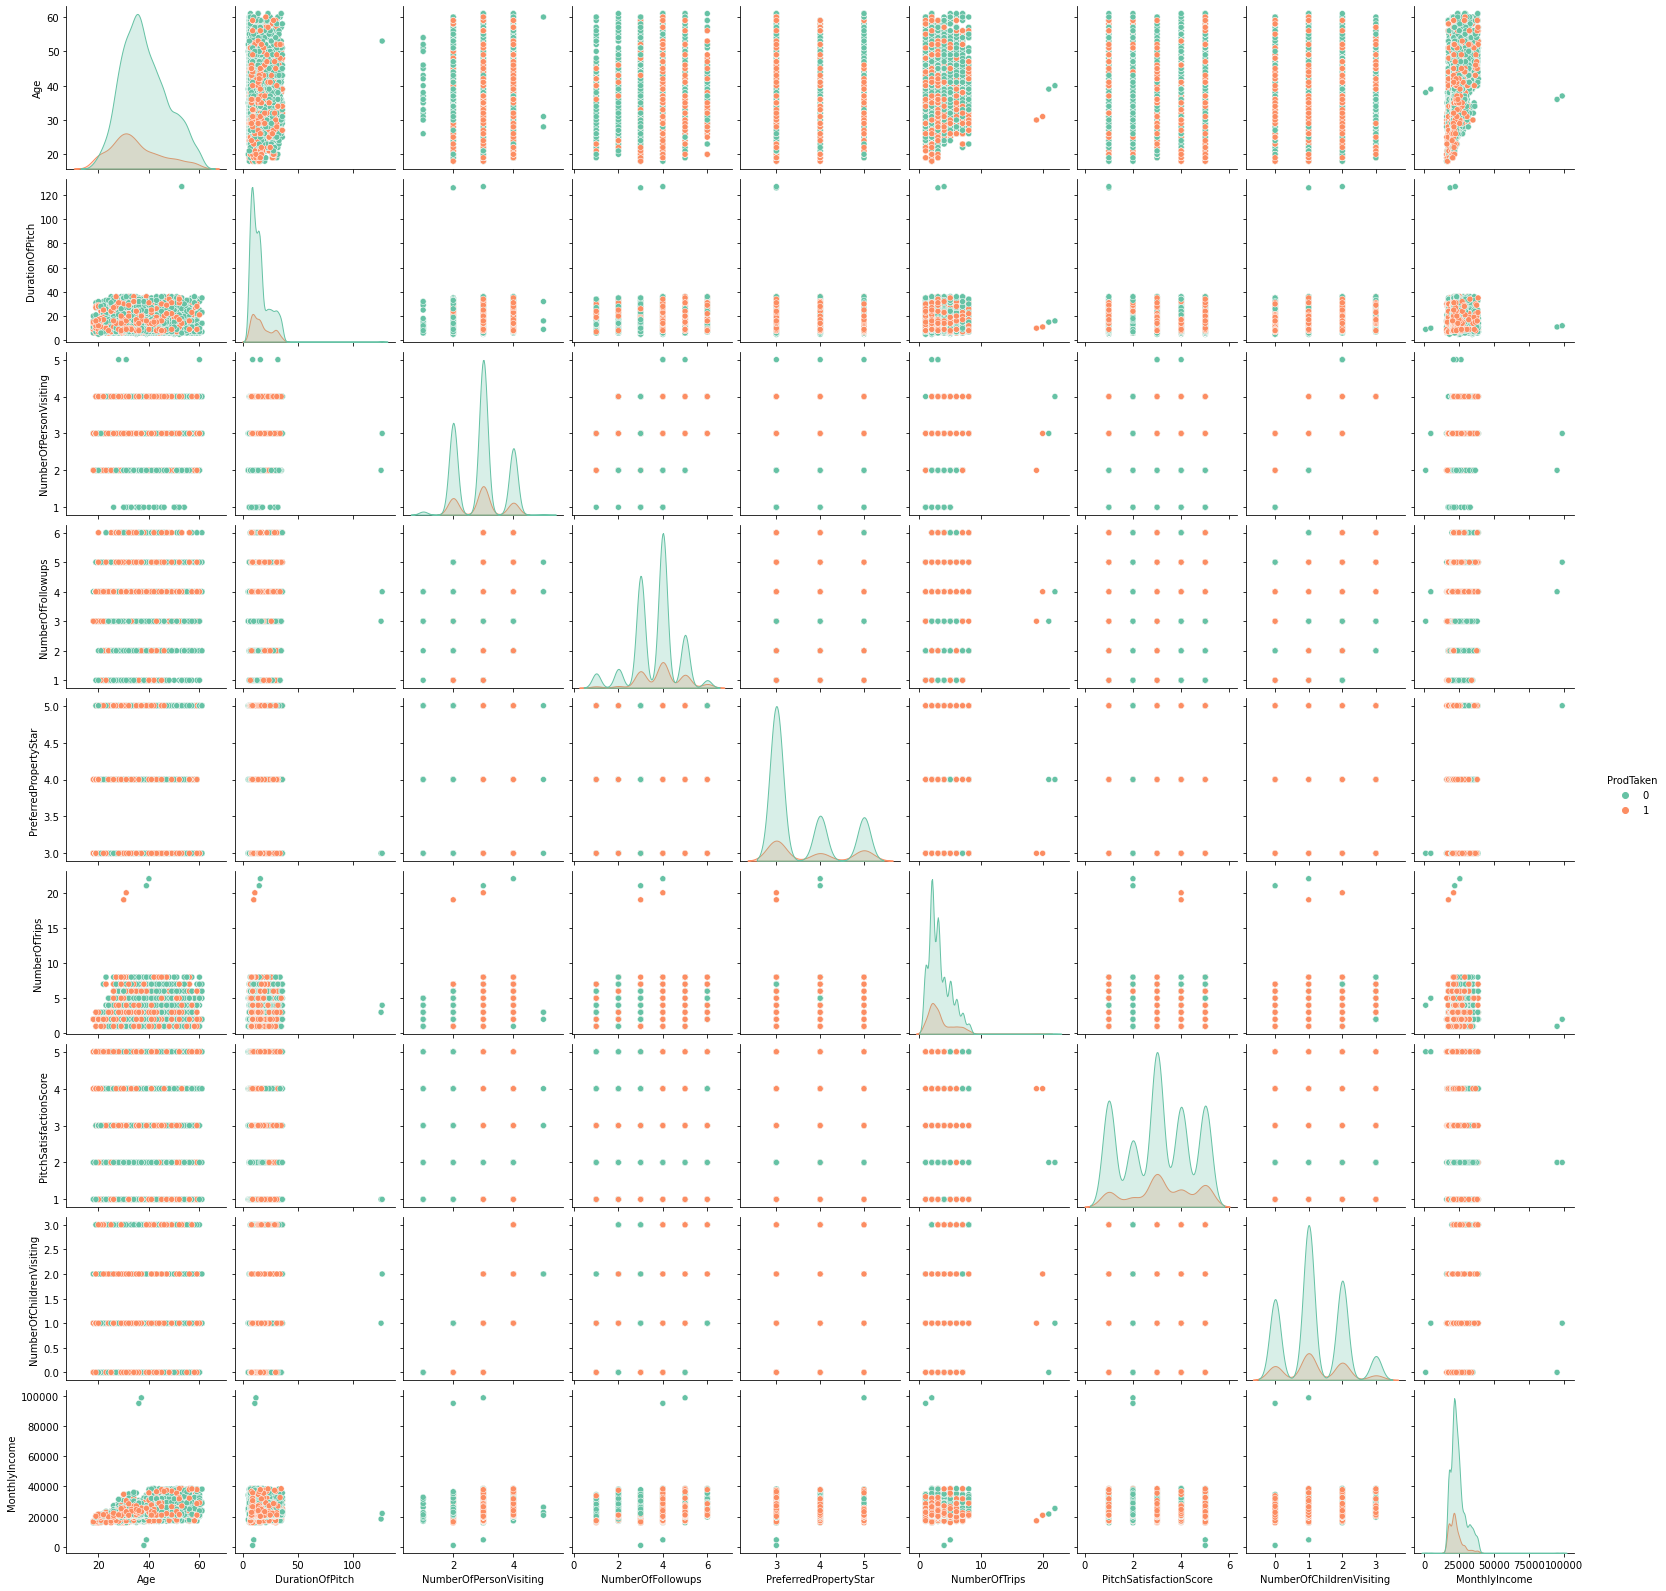

In [47]:
sns.pairplot(data, hue="ProdTaken")
plt.show()

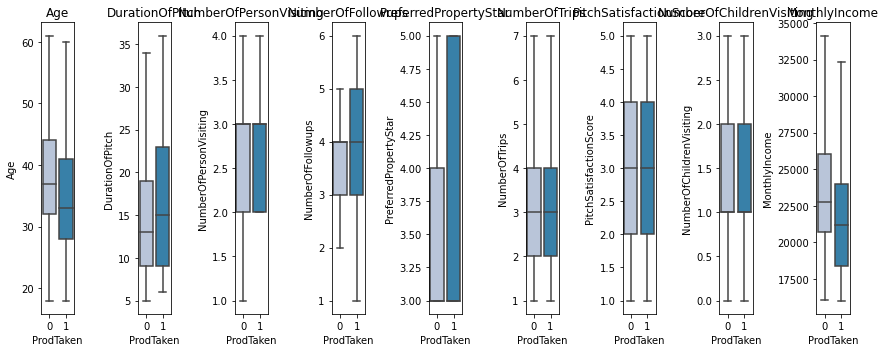

In [48]:
cols = data[['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome']].columns.tolist()
plt.figure(figsize=(12,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,9,i+1)
                     sns.boxplot(data['ProdTaken'],data[variable],showfliers=False,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

- Most people who bought the product are between the ages of 28-40
- Duration of pitch for most of those who bought the product lasted 10-23 mins, there doesn't seem to be a huge difference between the duration of pitch for those who bought vs those who didn't.
- Those who bought the product seem to have a greater number of followups than those who didn't, thereby probably increasing chances of buying.
- Customers who bought the package are mostly earning between $18,000-$23,000 a month.

## Data Cleaning

In [49]:
# Since there were quite a few missing values, we will treat them

In [50]:
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Age_Bin                     240
dtype: int64

In [51]:
data.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].median()

data['NumberOfFollowups']=data.groupby(["Gender",'ProductPitched'])["NumberOfFollowups"].apply(lambda x:x.fillna(x.median()))

In [52]:
# since preferred property seems to be associated with designation, we can use these values to impute
data['PreferredPropertyStar']=data.groupby(["Designation"])["PreferredPropertyStar"].apply(lambda x:x.fillna(x.median()))

In [53]:
# filling in mode here since there is an obvious disparity in numbers between self enquiry and invitation
data['TypeofContact'].mode()

data['TypeofContact']= data['TypeofContact'].fillna('Self Enquiry')

In [54]:
# filling duration of pitch based on the product and followups
data.groupby(['ProductPitched','NumberOfFollowups'], as_index=False)["DurationOfPitch"].median()
data["DurationOfPitch"] = data.groupby(["ProductPitched",'NumberOfFollowups'])["DurationOfPitch"].apply(
    lambda x: x.fillna(x.median()))

In [55]:
data['NumberOfChildrenVisiting']=data['NumberOfChildrenVisiting'].fillna(0)

In [56]:
# grouping with marital status since those married tend to take most of the trips
data["NumberOfTrips"] = data.groupby(["MaritalStatus"])["NumberOfTrips"].apply(
    lambda x: x.fillna(x.median()))

In [57]:
# Age can correlate to designation and marital status
data.groupby(["Designation","MaritalStatus"])["Age"].median()
data["Age"] = data.groupby(["Designation","MaritalStatus"])["Age"].apply(
    lambda x: x.fillna(x.median()))

In [58]:
# Monthly income can be imputed based on designation, occupation and often times, gender.
data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].median()
data["MonthlyIncome"]=data.groupby(["Occupation",'Designation','Gender'])["MonthlyIncome"].apply(
    lambda x: x.fillna(x.median()))

In [59]:
data['Age_Bin'] = pd.cut(data['Age'], bins = [15,25, 31, 40, 50, 70], labels = ['15-25','26-30', '31-40', '41-50', '51-70'])

In [60]:
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
Age_Bin                     0
dtype: int64

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

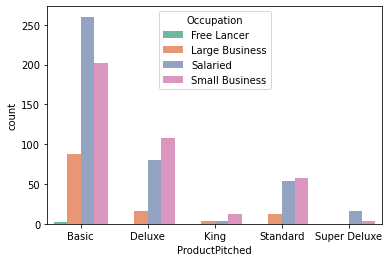

In [61]:
# looking at occupation vs product pitched
profile =data[data['ProdTaken']==1]
sns.countplot(x="ProductPitched", data=profile,  hue="Occupation")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

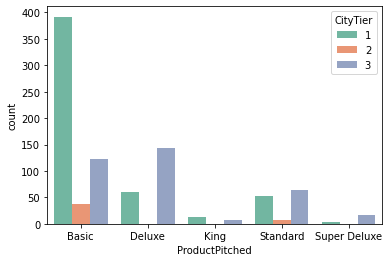

In [62]:
sns.countplot(x="ProductPitched", data=profile,  hue="CityTier")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

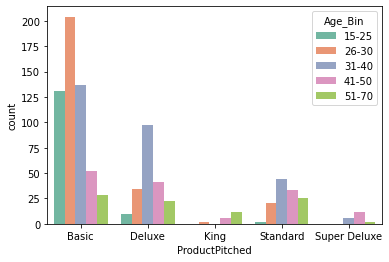

In [63]:
sns.countplot(x="ProductPitched", data=profile,  hue="Age_Bin")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

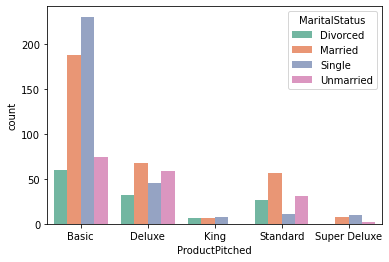

In [64]:
sns.countplot(x="ProductPitched", data=profile,  hue="MaritalStatus")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

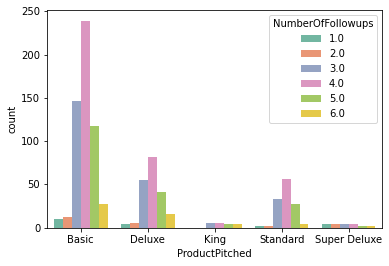

In [65]:
sns.countplot(x="ProductPitched", data=profile,  hue="NumberOfFollowups")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

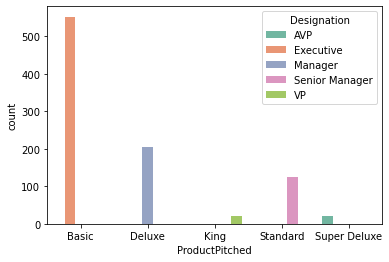

In [66]:
sns.countplot(x="ProductPitched", data=profile,  hue="Designation")

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

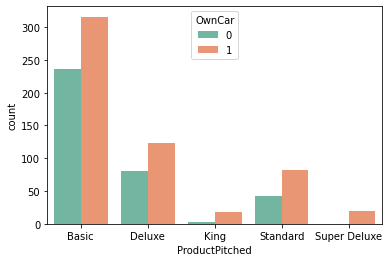

In [67]:
sns.countplot(x="ProductPitched", data=profile,  hue="OwnCar")

In [68]:
def stacked_barplot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,data['ProdTaken'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['ProdTaken'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Product Taken",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True)
    plt.show()

ProdTaken           0    1   All
TypeofContact                   
Company Invited  1109  310  1419
Self Enquiry     2859  610  3469
All              3968  920  4888
------------------------------------------------------------------------------------------------------------------------


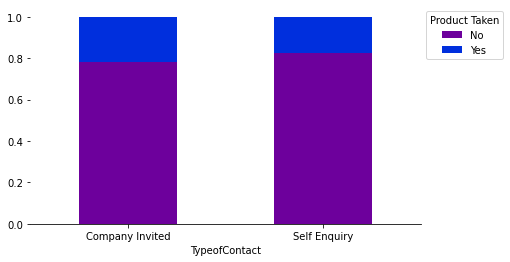

ProdTaken     0    1   All
CityTier                  
1          2670  520  3190
2           152   46   198
3          1146  354  1500
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


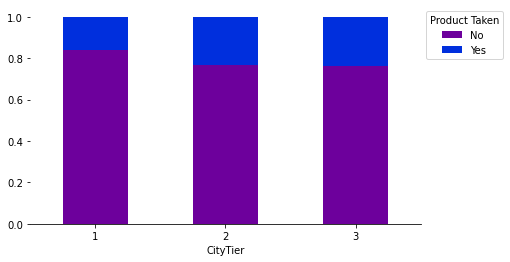

ProdTaken          0    1   All
Occupation                     
Free Lancer        0    2     2
Large Business   314  120   434
Salaried        1954  414  2368
Small Business  1700  384  2084
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


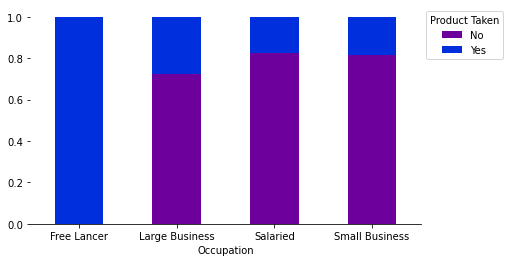

ProdTaken     0    1   All
Gender                    
Female     1630  342  1972
Male       2338  578  2916
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


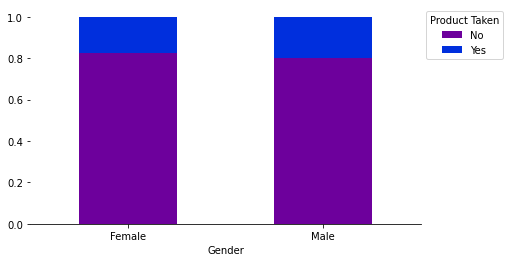

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
1                         39    0    39
2                       1151  267  1418
3                       1942  460  2402
4                        833  193  1026
5                          3    0     3
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


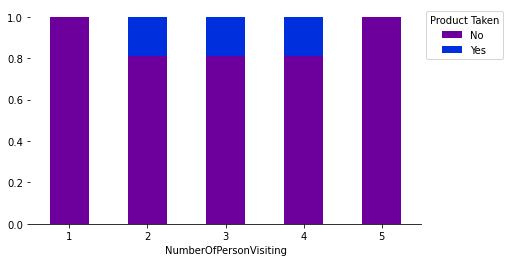

ProdTaken          0    1   All
ProductPitched                 
Basic           1290  552  1842
Deluxe          1528  204  1732
King             210   20   230
Standard         618  124   742
Super Deluxe     322   20   342
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


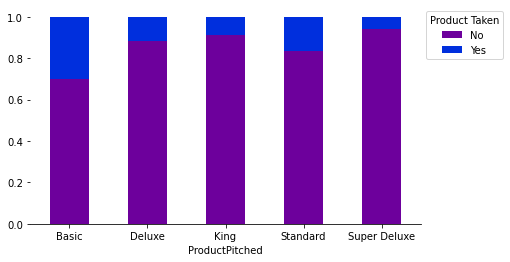

ProdTaken                 0    1   All
PreferredPropertyStar                 
3.0                    2531  488  3019
4.0                     731  182   913
5.0                     706  250   956
All                    3968  920  4888
------------------------------------------------------------------------------------------------------------------------


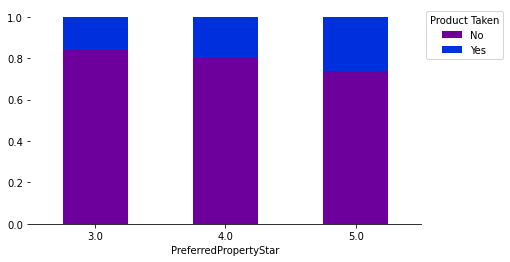

ProdTaken         0    1   All
NumberOfTrips                 
1.0             508  112   620
2.0            1186  305  1491
3.0             969  223  1192
4.0             417   61   478
5.0             396   62   458
6.0             258   64   322
7.0             156   62   218
8.0              76   29   105
19.0              0    1     1
20.0              0    1     1
21.0              1    0     1
22.0              1    0     1
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


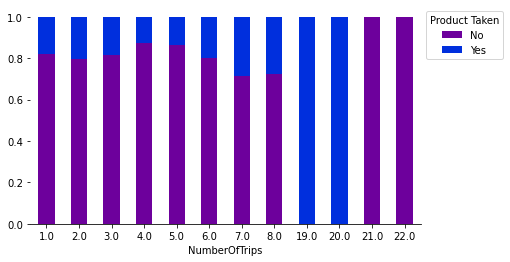

ProdTaken         0    1   All
MaritalStatus                 
Divorced        826  124   950
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
All            3968  920  4888
------------------------------------------------------------------------------------------------------------------------


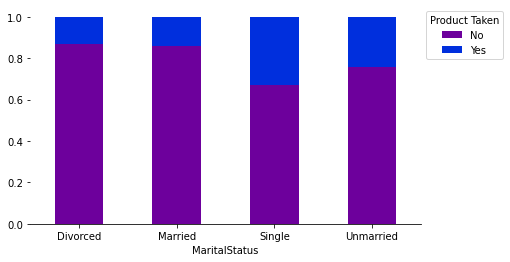

ProdTaken     0    1   All
Passport                  
0          3040  426  3466
1           928  494  1422
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


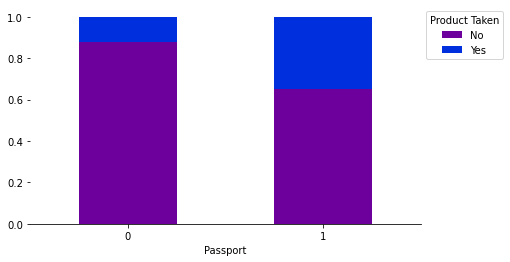

ProdTaken     0    1   All
OwnCar                    
0          1496  360  1856
1          2472  560  3032
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


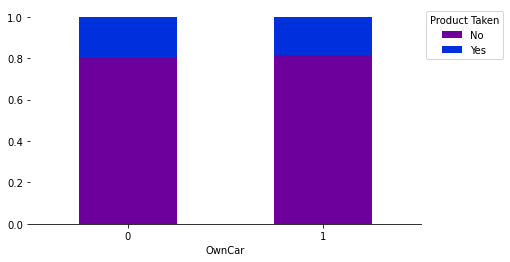

ProdTaken          0    1   All
Designation                    
AVP              322   20   342
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
VP               210   20   230
All             3968  920  4888
------------------------------------------------------------------------------------------------------------------------


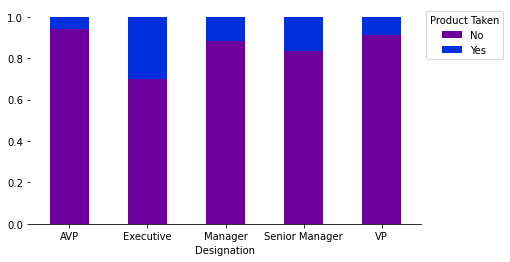

ProdTaken     0    1   All
Age_Bin                   
15-25       204  143   347
26-30       765  260  1025
31-40      1610  284  1894
41-50       929  144  1073
51-70       460   89   549
All        3968  920  4888
------------------------------------------------------------------------------------------------------------------------


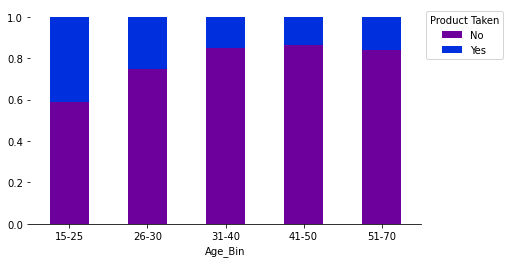

ProdTaken                  0    1   All
PitchSatisfactionScore                 
1                        798  144   942
2                        498   88   586
3                       1162  316  1478
4                        750  162   912
5                        760  210   970
All                     3968  920  4888
------------------------------------------------------------------------------------------------------------------------


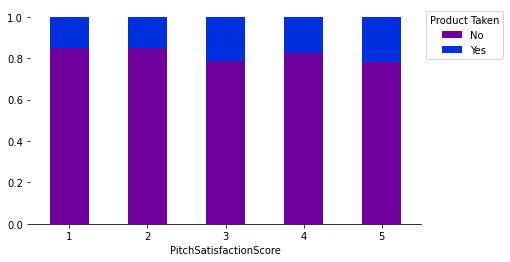

ProdTaken             0    1   All
NumberOfFollowups                 
1.0                 156   20   176
2.0                 205   24   229
3.0                1222  244  1466
4.0                1726  387  2113
5.0                 577  191   768
6.0                  82   54   136
All                3968  920  4888
------------------------------------------------------------------------------------------------------------------------


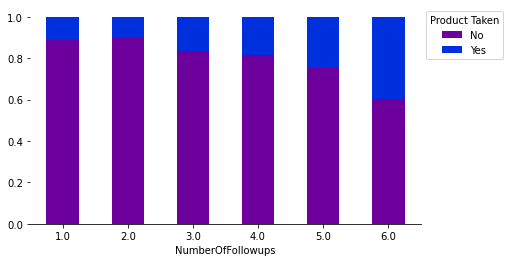

In [69]:
columns=['TypeofContact','CityTier','Occupation','Gender','NumberOfPersonVisiting',
              'ProductPitched','PreferredPropertyStar','NumberOfTrips','MaritalStatus','Passport','OwnCar','Designation','Age_Bin','PitchSatisfactionScore','NumberOfFollowups']
for i, variable in enumerate(columns):
       stacked_barplot(data[variable])

Observations: 
- The basic package is the most common package that customers seem to purchase. These people are 26-30, mostly salaried, mostly reside in tier 1 cities and single.
- The deluxe package customers are mostly 31-40, live in tier 3 cities, are managers, own small businesses and are married.
- The king package mostly consists of those who are 51-60, live in tier 1 cities, are single and/or potentially own small businesses.
- The superdeluxe package consists of customers with age range 41-50, live in tier 3 cities, single, and salaried.
- The standard package mostly consists of people ranging from age 31-40, mostly married, from tier 3 cities, have small businesses and mostly senior managers.

EDA Insights:
    
- More customers bought the basic package, probably cuz it is a more budget friendly option
- Customers who were followed up more were more likely to buy a travel package
- Most of the customers who bought the package were single and more likely to have a passport
- Most common designation of customers who bought product was executive, likely due to correlation with income 
- People who took more trips had a better chance of purchasing the product

#### Outlier Treatment

In [70]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

# Interquartile range
IQR = Q3 - Q1               

lower=Q1-1.5*IQR 
upper=Q3+1.5*IQR

In [71]:
((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Age                         0.000000
DurationOfPitch             2.291326
NumberOfPersonVisiting      0.061375
NumberOfFollowups           6.382979
PreferredPropertyStar       0.000000
NumberOfTrips               2.229951
PitchSatisfactionScore      0.000000
NumberOfChildrenVisiting    0.000000
MonthlyIncome               7.528642
dtype: float64

In [72]:
# looking at top end of extreme values of two variable that may not be available for most new customers
data.sort_values(by=["MonthlyIncome"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_Bin
2482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0,31-40
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0,31-40
2634,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Divorced,2.0,0,2,1,2.0,VP,38677.0,51-70
4104,0,53.0,Self Enquiry,1,7.0,Salaried,Male,4,5.0,King,3.0,Married,2.0,0,1,1,3.0,VP,38677.0,51-70
3190,0,42.0,Company Invited,1,14.0,Salaried,Female,3,6.0,King,3.0,Married,3.0,0,4,1,1.0,VP,38651.0,41-50


In [73]:
data.sort_values(by=["NumberOfTrips"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_Bin
3260,0,40.0,Company Invited,1,16.0,Salaried,Male,4,4.0,Deluxe,4.0,Unmarried,22.0,0,2,1,1.0,Manager,25460.0,31-40
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0,31-40
2829,1,31.0,Company Invited,1,11.0,Large Business,Male,3,4.0,Basic,3.0,Single,20.0,1,4,1,2.0,Executive,20963.0,26-30
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0,26-30
3155,1,30.0,Self Enquiry,1,17.0,Salaried,Female,4,5.0,Basic,5.0,Single,8.0,1,5,1,2.0,Executive,21082.0,26-30


In [74]:
data.sort_values(by=["DurationOfPitch"],ascending = False).head(5)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_Bin
3878,0,53.0,Company Invited,3,127.0,Salaried,Male,3,4.0,Basic,3.0,Married,4.0,0,1,1,2.0,Executive,22160.0,51-70
1434,0,33.0,Company Invited,3,126.0,Salaried,Male,2,3.0,Basic,3.0,Married,3.0,0,1,1,1.0,Executive,18482.0,31-40
3870,0,33.0,Self Enquiry,1,36.0,Salaried,Female,3,5.0,Basic,4.0,Unmarried,3.0,0,3,1,1.0,Executive,21515.0,31-40
2715,1,48.0,Company Invited,1,36.0,Salaried,Male,3,4.0,Standard,4.0,Divorced,3.0,1,3,1,1.0,Senior Manager,30527.0,41-50
4055,0,46.0,Self Enquiry,1,36.0,Small Business,Male,3,4.0,Basic,3.0,Unmarried,7.0,0,1,1,1.0,Executive,22130.0,41-50


In [75]:
data.drop(index=data[(data.MonthlyIncome>40000) | (data.MonthlyIncome<12000)].index,inplace=True)
data.drop(index=data[data.NumberOfTrips>10].index,inplace=True)
data.drop(index=data[data.DurationOfPitch>37].index,inplace=True)

## Model Building- Bagging

#### Recall needs to be maximized, as the greater the Recall , the higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1)
F1 score should be looked at as well

### Splitting Dataset

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4878 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4878 non-null   category
 1   Age                       4878 non-null   float64 
 2   TypeofContact             4878 non-null   category
 3   CityTier                  4878 non-null   category
 4   DurationOfPitch           4878 non-null   float64 
 5   Occupation                4878 non-null   category
 6   Gender                    4878 non-null   object  
 7   NumberOfPersonVisiting    4878 non-null   int64   
 8   NumberOfFollowups         4878 non-null   float64 
 9   ProductPitched            4878 non-null   category
 10  PreferredPropertyStar     4878 non-null   float64 
 11  MaritalStatus             4878 non-null   category
 12  NumberOfTrips             4878 non-null   float64 
 13  Passport                  4878 non-null   catego

In [77]:
# Since there are variable that may not be available for new customers, these variables will be dropped in the process of model building
X = data.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched','NumberOfFollowups','DurationOfPitch','Age_Bin'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = data['ProdTaken']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=y)
X_train.shape, X_test.shape

((3414, 22), (1464, 22))

In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [80]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.876366  0.663043   0.675277  0.669104


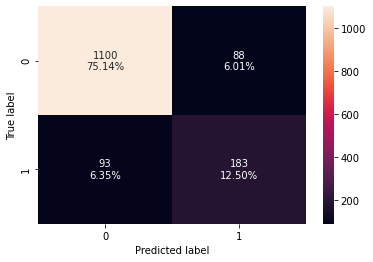

In [81]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

### Random Forest

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.896175  0.518116   0.882716  0.652968


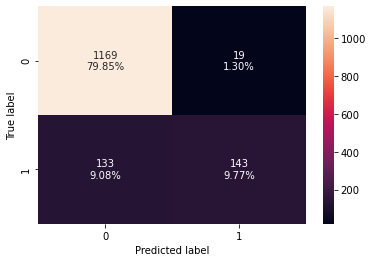

In [82]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

- Random Forest also overfits the data.

### Bagging Classifier

   Accuracy    Recall  Precision        F1
0  0.989748  0.950156   0.995106  0.972112
   Accuracy    Recall  Precision        F1
0  0.887978  0.528986   0.811111  0.640351


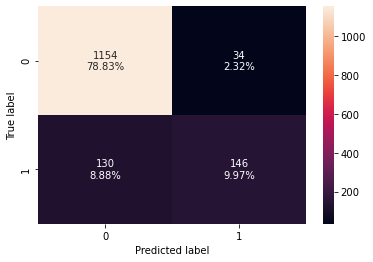

In [83]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

- Test data recall score barely above that of RF, data is still being overfit here

### Model Improvement- Bagging

In [93]:
# DTree improvement

#Choose the type of classifier. 
dtree_tuned = DecisionTreeClassifier(class_weight={0:0.12,1:0.8},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': [1,4,7,15], 
              'min_samples_leaf': [2, 3, 5],
              'max_leaf_nodes' : [5, 7, 10,15],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.12, 1: 0.8}, max_depth=4,
                       max_leaf_nodes=15, min_samples_leaf=3, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.749854  0.708723   0.405526  0.515873
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.72541  0.688406   0.375494  0.485934


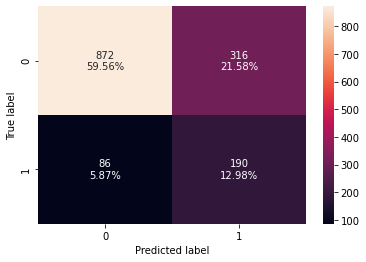

In [101]:
#Calculating different metrics
dtree_tuned_model_train_perf=model_performance_classification_sklearn(dtree_tuned,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_tuned_model_test_perf=model_performance_classification_sklearn(dtree_tuned,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_tuned,X_test,y_test)

In [96]:
# RF improvement
rf_tuned = RandomForestClassifier(class_weight={0:0.2,1:0.80},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': [5,9,15],
                'max_features': ['auto'],
                'min_samples_leaf': np.arange(5, 10),
                'n_estimators': [150, 200, 250, 500],
                'max_samples': np.arange(0.3,0.5, 0.7)
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       max_samples=0.3, min_samples_leaf=7, n_estimators=500,
                       oob_score=True, random_state=1)

- Testing F1 score went down a bit

Training performance:
    Accuracy    Recall  Precision        F1
0  0.852373  0.657321   0.597734  0.626113
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.826503  0.597826   0.535714  0.565068


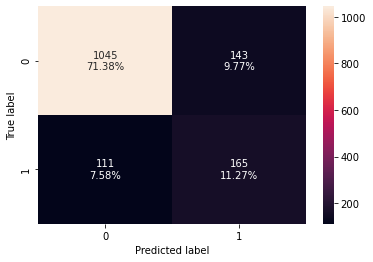

In [97]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

- F1 performance went down slightly when tuned

In [102]:
# Tuning BC

# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision       F1
0  0.999414  0.996885        1.0  0.99844
   Accuracy    Recall  Precision        F1
0  0.896175  0.525362   0.873494  0.656109


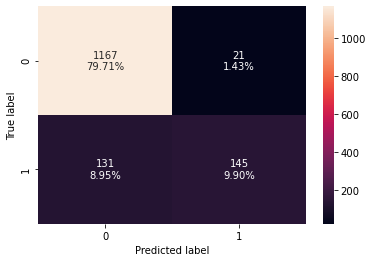

In [103]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

- F1 score is better here than other two models

## Model Building - Boosting

### Adaboost

   Accuracy    Recall  Precision        F1
0  0.845343  0.303738   0.706522  0.424837
   Accuracy    Recall  Precision        F1
0  0.845628  0.293478   0.723214  0.417526


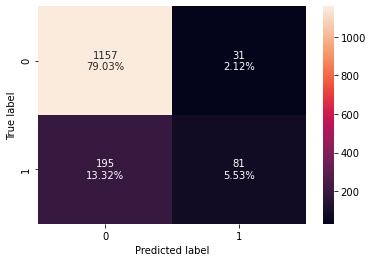

In [104]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

- Very low F1 score still

### Gradient Boost

Training performance:
    Accuracy    Recall  Precision        F1
0  0.879613  0.445483    0.83871  0.581892
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.867486  0.405797   0.788732  0.535885


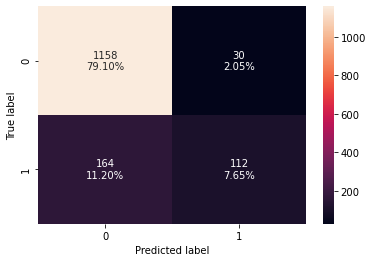

In [107]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- Recall increased a bit as did the F1 score

### XGBoost

Training performance:
    Accuracy    Recall  Precision       F1
0  0.994435  0.970405        1.0  0.98498
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.878415  0.496377   0.778409  0.606195


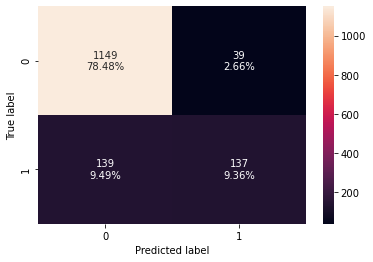

In [108]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- Best performance/F1 score so far in boosting models

### Model Improvement- Boosting

In [110]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(10,50,100),
    "learning_rate":np.arange(0.1,1,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.9, n_estimators=10, random_state=1)

   Accuracy    Recall  Precision        F1
0  0.847979  0.334891   0.700326  0.453109
   Accuracy    Recall  Precision        F1
0   0.84153  0.318841   0.666667  0.431373


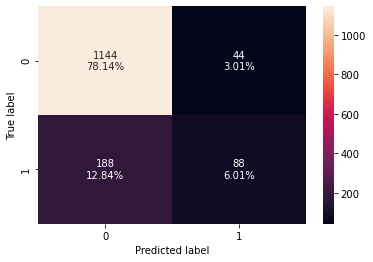

In [111]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

In [112]:
# GB Tuning
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=250, random_state=1,
                           subsample=0.8)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.91652  0.616822   0.910345  0.735376
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.859973  0.442029   0.705202  0.54343


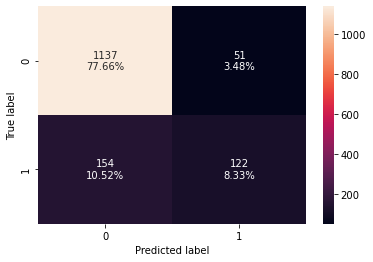

In [113]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

***XGB tuning super slow, so it is not present**

### Stacking Classifier

In [118]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_classifier

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.2,
                                                                     1: 0.8},
                                                       max_depth=9,
                                                       max_samples=0.3,
                                                       min_samples_leaf=7,
                                                       n_estimators=500,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=250,
                                                         

Training performance:
    Accuracy    Recall  Precision       F1
0  0.902753  0.661994   0.787037  0.71912
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.842213  0.478261    0.60274  0.533333


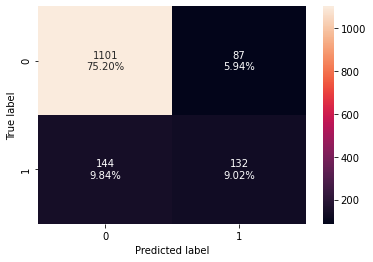

In [125]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Stacking classifier seems to overfit slightly as there are decently big differences between training and testing data

In [126]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
     stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,1.0,0.749854,1.0,0.852373,0.989748,0.999414,0.845343,0.847979,0.879613,0.916520,0.994435,0.902753
Recall,1.0,0.708723,1.0,0.657321,0.950156,0.996885,0.303738,0.334891,0.445483,0.616822,0.970405,0.661994
Precision,1.0,0.405526,1.0,0.597734,0.995106,1.000000,0.706522,0.700326,0.838710,0.910345,1.000000,0.787037
F1,1.0,0.515873,1.0,0.626113,0.972112,0.998440,0.424837,0.453109,0.581892,0.735376,0.984980,0.719120


In [127]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
     stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,Stacking Classifier
Accuracy,0.876366,0.725410,0.896175,0.826503,0.887978,0.896175,0.845628,0.841530,0.867486,0.859973,0.878415,0.842213
Recall,0.663043,0.688406,0.518116,0.597826,0.528986,0.525362,0.293478,0.318841,0.405797,0.442029,0.496377,0.478261
Precision,0.675277,0.375494,0.882716,0.535714,0.811111,0.873494,0.723214,0.666667,0.788732,0.705202,0.778409,0.602740
F1,0.669104,0.485934,0.652968,0.565068,0.640351,0.656109,0.417526,0.431373,0.535885,0.543430,0.606195,0.533333


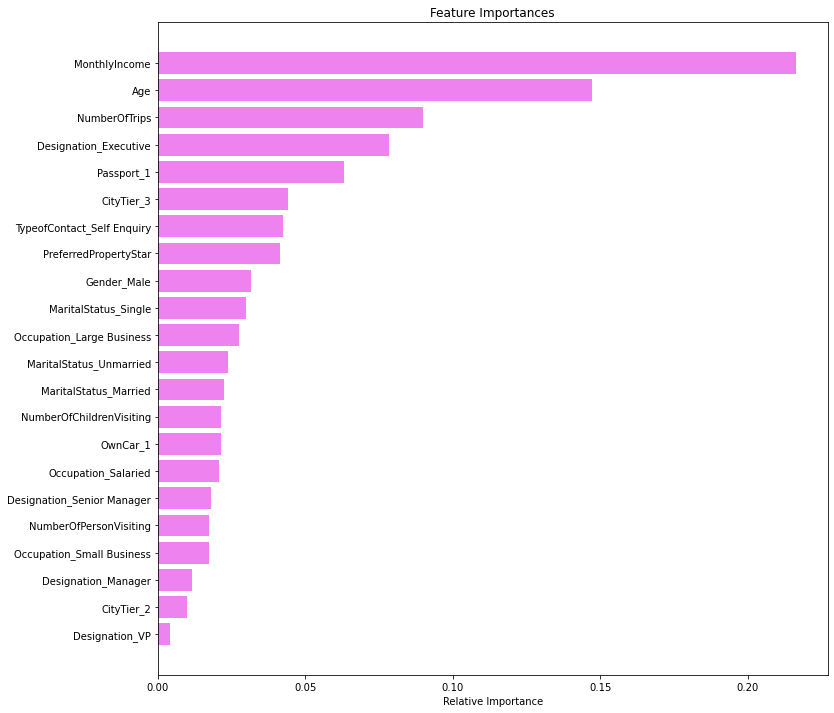

In [128]:
feature_names = X_train.columns
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Decision Tree had the best and most generalized model.
- Stacking would probably be a helpful exercise to improve model performance

#### Conclusions

- Feature Importances show Income, Age, Passport status and City tiers as some of the most determining features for whether or not a product will be purchased
- Things like gender and children visiting are less important to detemine whether or not a product will be bought

### Business Insights and Recommendations

- This model thoroughly identifies a customer base that would be interested in buying a travel package.
- Key factors that determine a customers interest in purchasing the product include:

    - Important features: Income, City Tier, Occupation, Passport Status, and Designation.
    - Main targets should include: Executives, Customers with Passports, Tier 3 city residents, and those who are single. 
    - EDA shows that those who are presented long pitches and are followed up often are more likely to purchase the product- an increase in customer interaction can potentially lead to more products being sold.
    - Targeting customers based on age demographic also helps sell certain packages 